#**3.3.0 MEDIDAS DE SIMILARIDAD o SIMILITUD**

Muchas técnicas de data science están basadas en medir la similaridad entre objetos. Por ejemplo y KNN (clasificación), K-Means (clustering) determinan qué vecinos son más parecidos.

Medir la similaridad entre objetos puede realizarse de muchas formas.





La 'distancia' puede calcularse entre dos vectores, números o pares. Es una medida de qué tan similares son dos objetos. En este caso los objetos son similares si la distancia entre ellos es pequeña.

La idea es comparar dos objetos, una forma sencilla es cuando sólo tienen una característica, por ejemplo si se consideran dos blusas por su talla
# 👚

se podría producir un sólo valor numérico.


##Distancia Euclideana

La más simple, mide la distancia de forma trigonométrica $d(x,y) = \sqrt {\sum _{i=1}^k(x_i-y_i)^2}$





Cuando los datos son densos o continuos, es la mejor medida de proximidad. La distancia euclideana entre dos puntos es la longitud de la línea que los conecta, dada por el Teorema de Pitágoras.

<img src = "https://bigsnarf.files.wordpress.com/2012/03/distance.jpg" />

##Distancia de Manhattan

Es una métrica donde la distancia entre dos puntos es la suma de la diferencia absoluta en coordenadas cartesiana:

En un plano con $p_1$ en $(x_1,y_1)$ y $p_2$ en $(x_2,y_2)$

distanciaManhattan= $|x_1–x_2|+|y_1–y_2||x_1–x_2|+|y_1–y_2|$.

También se conoce como longitud de Manhattan, geometría del taxista, distancia rectilinea, distancia L1, norma L1, distancia de cuadras.

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Manhattan_distance.svg/1200px-Manhattan_distance.svg.png" width = "300"/>

Hay muchas otras formas, por ejemplo Pandas ofrece algunas:      

In [ ]:
#Comparar dos series de Pandas

import pandas as pd
import numpy as np

s1 = pd.Series ([10,20,30,40,50,60])
s2 = pd.Series ([10,30,30,40,55,60])

print ("S1:\n", s1)
print ("\nS2:\n", s2)

diferencia = s1.compare (s2)
print ("\nDiferencia entre las series:\n", diferencia)

dE = np.linalg.norm (s1-s2)#Distancia euclideana
print ("\nDistancia Euclideana: ", dE)

S1:
 0    10
1    20
2    30
3    40
4    50
5    60
dtype: int64

S2:
 0    10
1    30
2    30
3    40
4    55
5    60
dtype: int64

Diferencia entre las series:
    self  other
1  20.0   30.0
4  50.0   55.0

Distancia Euclideana:  11.180339887498949


In [ ]:
d = np.sqrt(100+25)
d

11.180339887498949

La librería [scipy.spatial.distance](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html) también ofrece diferentes formas de calcular distancias

In [ ]:
from scipy.spatial import distance

#Definición de vectores
a = [2,4,4,6]  #3^2+1^2+3^2+2^2= 23 ---> sqrt(23) = 4.795831523312719  //Distancia euclidiana
b = [5,5,7,8]
dE = distance.euclidean (a,b)#distancia euclidiana
dM = distance.cityblock (a,b)# distancia de Manhattan
print ("Euclideana: ", dE)
print ("Manhattan: ", dM)

Euclideana:  4.795831523312719
Manhattan:  9


In [ ]:
#Usando un DataFrame
df = pd.DataFrame({'A': [2, 4, 4, 6],
                   'B': [5, 5, 7, 8],
                   'C': [9, 12, 12, 13]})

distance.cityblock (df.A, df.B)

9

La **distancia de Hamming** entre dos vectores es simplemente la suma de los elementos correspondientes que difieren. La función regresa el porcentaje de los elementos que difieren, por lo que hay que multiplicarlo por la longitud de uno de los arreglos.

In [ ]:
x = [7, 12, 14, 19, 22]
y = [7, 12, 16, 26, 27]

distance.hamming (x,y) * len (x)

3.0

La **distancia de Jaccard** mide la similaridad entre dos conjuntos de datos, en el rango de 0 a 1. 1 es la similaridad más alta:

Se calcula como:

`jaccard = (número de observaciones en ambos conjuntos)/(número en ambos conjuntos)`

i.e.,

J(A, B) = |A∩B| / |A∪B|

In [ ]:
def jaccard(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

In [ ]:
a = [0, 1, 2, 5, 6, 8, 9]
b = [0, 2, 3, 4, 5, 7, 9]

jaccard (a,b)

0.4

In [ ]:
#Regresa 0 si los conjuntos no comparten valores
c = [0, 1, 2, 3, 4, 5]
d = [6, 7, 8, 9, 10]

jaccard(c, d)

0.0

In [ ]:
#Regresa 1 si son iguales
e = [0, 1, 2, 3, 4, 5]
f = [0, 1, 2, 3, 4, 5]

jaccard(e, f)

1.0

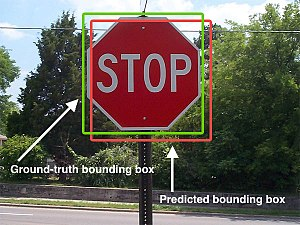

Jaccard es muy utilizado en imágenes para la detección de objetos.

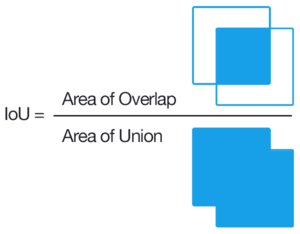

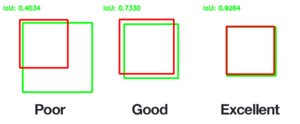

#SIMILARIDAD ENTRE DOS CURVAS


Conjunto de puntos ordenados de un inicio a un final

Por ejemplo, las siguientes curvas. Donde se desea cuantificar que diferencia existe entre la curva numérica y la experimental. Note además, que las curvas tienen diferente número de puntos.

En el caso ideal, las dos curvas deberían ser exactamente iguales, una exactamente arriba de la otra, en cuyo caso la medida de similaridad sería cero.

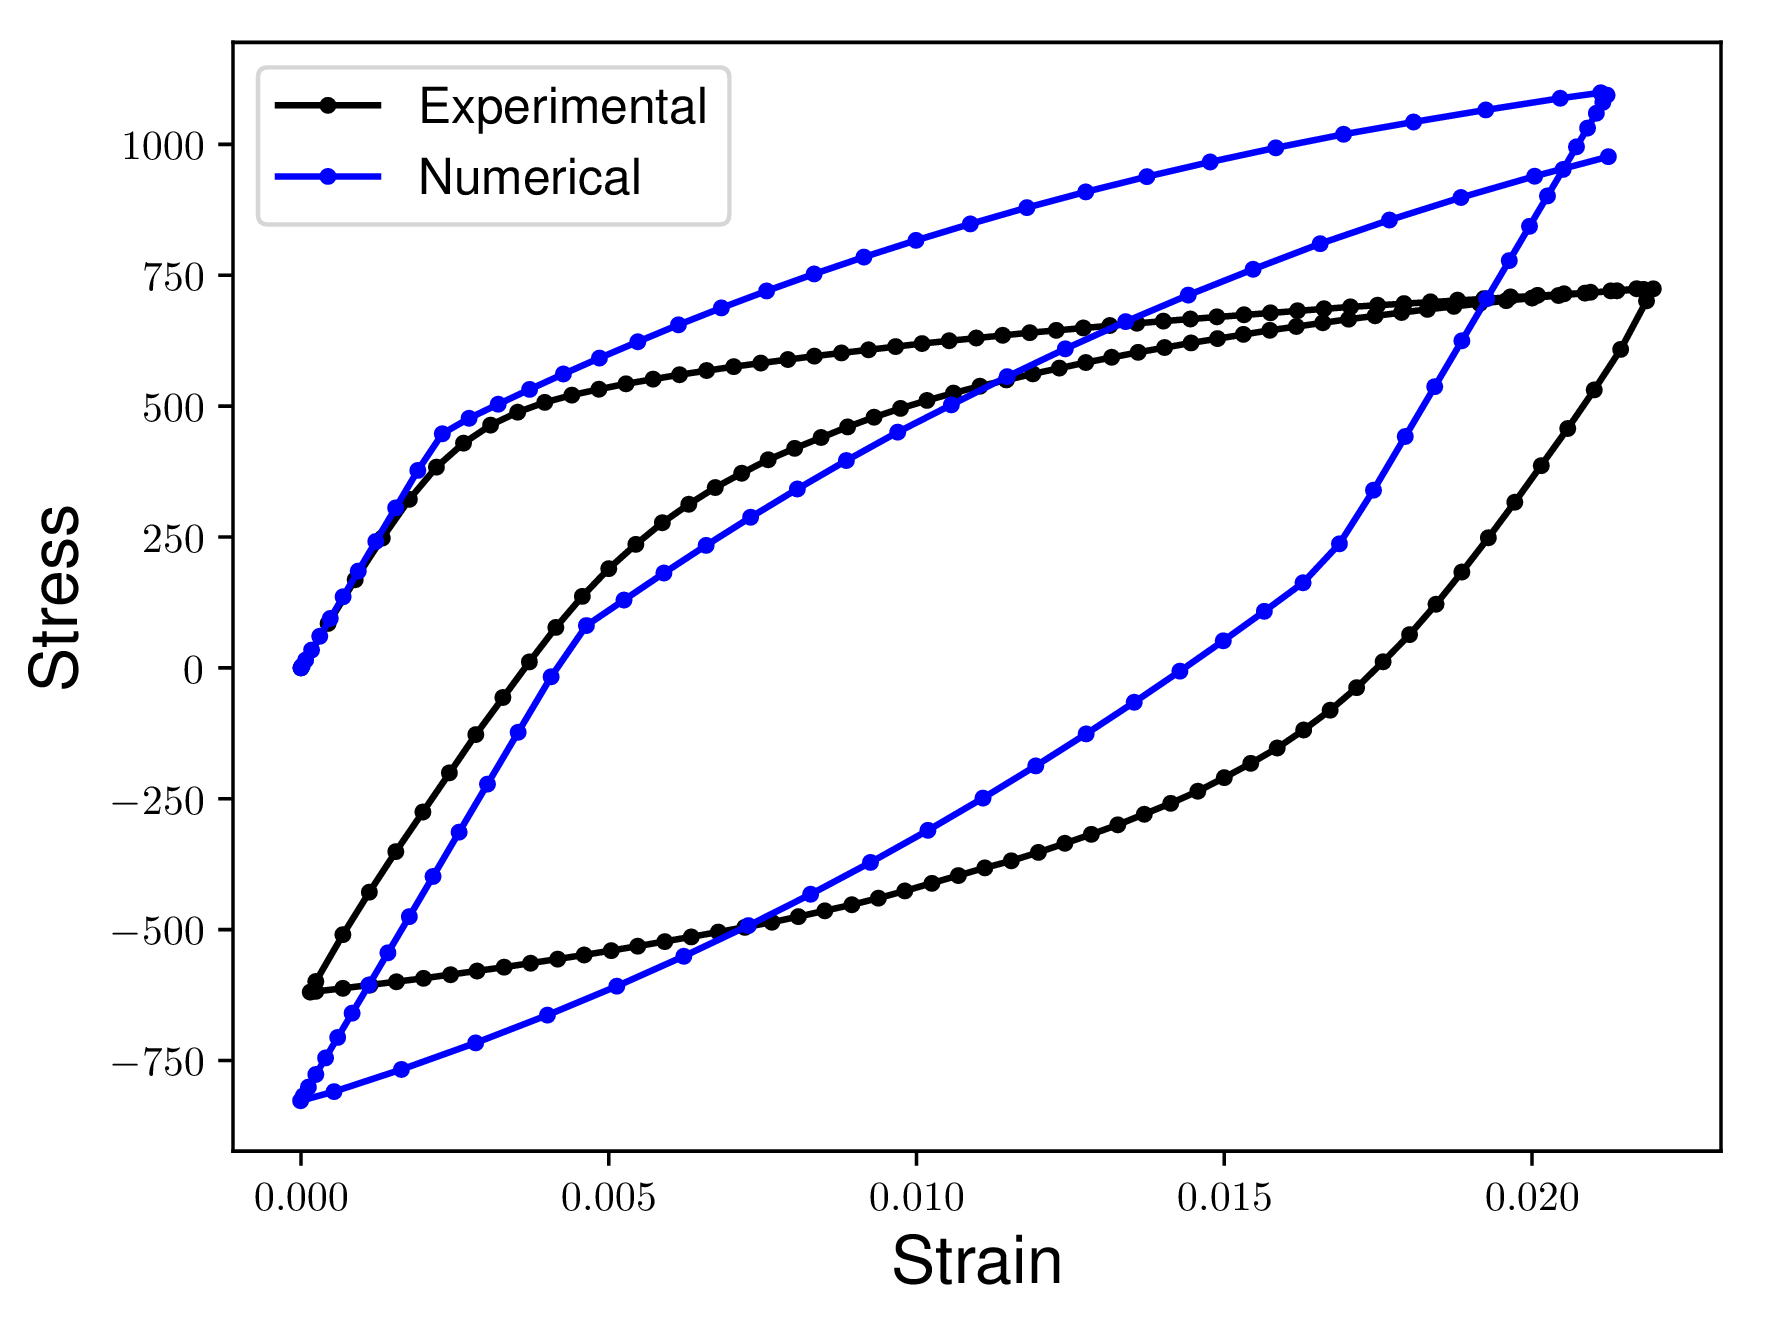

La librería similaritymeasures https://pypi.org/project/similaritymeasures/ permite cuantificar esta diferencia (o similaridad) entre dos curvas:



*   Partial Curve Mapping (PCM): Mapea el area de un subconjunto entre las dos curvas
*   Area method: Calcula el área entre dos curvas en el espacio 2D
*   Discrete Frechet distance: Distancia más corta entre dos curvas, considera la velocidad a la viajan las curvas de manera independiente (Paseo del perro)
*   Curve Length: Considera que la única variable independiente es la longitud del arco de la curva desde el origen
*   Dynamic Time Warping (DTW): Distancia entre dos series de tiempo



In [ ]:
#Instalación de la librería
!pip install similaritymeasures

     |████████████████████████████████| 395 kB 5.1 MB/s 
  Created wheel for similaritymeasures: filename=similaritymeasures-0.4.4-py3-none-any.whl size=14557 sha256=1be6da0b1006aff93d3492e3368f45f6c0577288ff64f7bf143b6b3ecdadf38a
  Stored in directory: /root/.cache/pip/wheels/a9/3a/35/009cc44db92a3500424a89baac7e77c219a44209c67f867a1e
Successfully built similaritymeasures


pcm:  2.1934232979039265 
df:  0.6690733544055978 
area:  1.3558763011802104 
c1:  2.2638638609279713 
dtw:  4.234671879389225


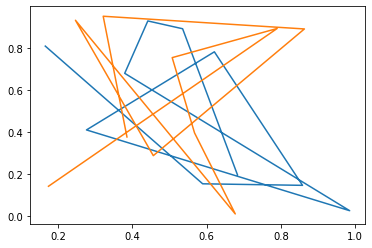

In [ ]:
#Ejemplo para calcular las diferentes medidas de similaridad

import numpy as np
import similaritymeasures
import matplotlib.pyplot as plt

# Generación aleatoria de datos experimentales
x = np.random.random(10)
y = np.random.random(10)
exp_data = np.zeros((10, 2))
exp_data[:, 0] = x
exp_data[:, 1] = y

# Generación aleatoria de datos numéricos
x = np.random.random(10)
y = np.random.random(10)
num_data = np.zeros((10, 2))
num_data[:, 0] = x
num_data[:, 1] = y

# cuantificación de la diferencia usado PCM
pcm = similaritymeasures.pcm(exp_data, num_data)

# cuantificación de la diferencia usando
# Discrete Frechet distance
df = similaritymeasures.frechet_dist(exp_data, num_data)

# cuantificación de la diferencia usando el area entre las dos curvas
area = similaritymeasures.area_between_two_curves(exp_data, num_data)

# cuantificación de la diferencia usando
# Curve Length 
cl = similaritymeasures.curve_length_measure(exp_data, num_data)

# cuantificación de la diferencia usando 
# Dynamic Time Warping 
dtw, d = similaritymeasures.dtw(exp_data, num_data)

# Impresión de resultados
print("pcm: ",pcm, "\ndf: ", df, "\narea: ", area, "\nc1: ", cl, "\ndtw: ", dtw)

# graficación de los datos
plt.figure()
plt.plot(exp_data[:, 0], exp_data[:, 1])
plt.plot(num_data[:, 0], num_data[:, 1])
plt.show()

##DTW

Dynamic Time Warping (DTW) es una forma de comparar dos secuencias -casi siempre temporales- que no se sincronizan perfectamente. Este método permite calcular el mapeo óptimo entre dos secuencias, se usa en recocimiento del habla, data mining, mercados financieros, etc. y es muy usado para medir la distancia entre dos series de tiempo.

Formulación:

Considere dos secuencias:

$X = x_1,x_2,...,x_i,...,x_n$
$Y = y_1,y_2,...,y_j,...,y_m$

Las secuencias $X$ y $Y$ pueden arreglarse en una matriz $nXm$, donde cada (i,j) es la alineación entre $x_i$ y $y_j$.

Un camino deformado *(warping)* $W$ mapea los elementos de $X$ y $Y$ para minimizar la distancia entre ellos. $W$ es una secuencia de puntos (i,j).

El camino optimo (i<sub>k</sub>, j<sub>k</sub>) puede calcularse como:

Dmin (i<sub>k</sub>, j<sub>k</sub>) = min <sub> i<sub>k-1</sub>, j<sub>k-1</sub> </sub> Dmin (i<sub>k-1</sub>, j<sub>k-1</sub>) + d (i<sub>k</sub>, j<sub>k</sub> | i<sub>k-1</sub>, j<sub>k-1</sub>)

donde d es es la distancia euclideana $d(i,j) = ||f_1(i)-f_2(j)||$

El costo total $$D = \sum_{k} d (i_k, j_k)$$

Algunas restricciones de la función deformada: 


*   condiciones límite
*   monotónica
*   movimientos como los de un rey en el ajedrez, horizontal, vertical y diagonal




##Ejemplo 0. sin DTW

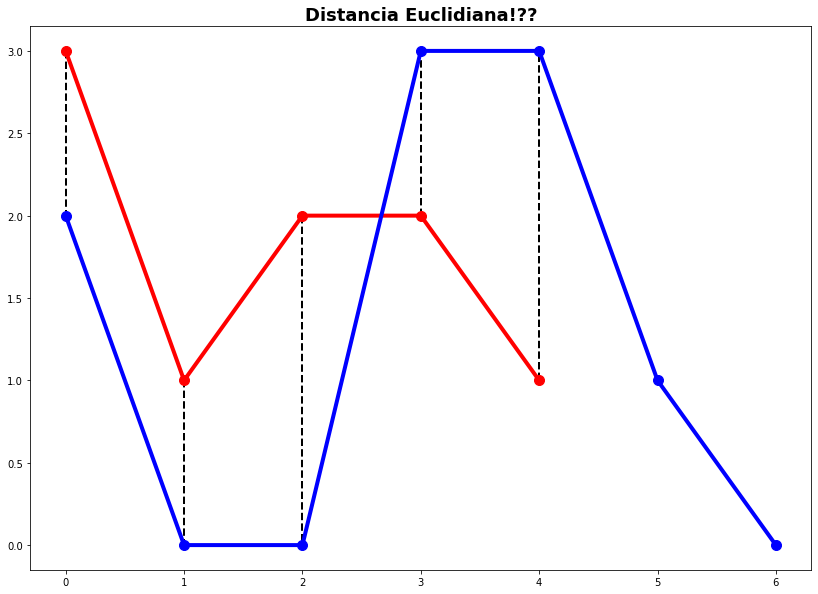

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Creación de dos secuencias
x = [3, 1, 2, 2, 1]
y = [2, 0, 0, 3, 3, 1, 0]

fig, ax = plt.subplots(figsize=(14, 10))
xx = [(i, x[i]) for i in np.arange(0, len(x))]
yy = [(j, y[j]) for j in np.arange(0, len(y))]

for i, j in zip(xx, yy[:-2]):
    ax.plot([i[0], j[0]], [i[1], j[1]], '--k', linewidth=2)

ax.plot(x, '-ro', label='x', linewidth=4, markersize=10, markerfacecolor='red', markeredgecolor='red')
ax.plot(y, '-bo', label='y', linewidth=4, markersize=10, markerfacecolor='blue', markeredgecolor='blue')
ax.set_title("Distancia Euclidiana!??", fontsize=18, fontweight="bold");

##Cálculo de la distancia DTW y camino deformado

Hay muchos paquetes en Python que calculan el DTW, uno de los más populares es [FastDTW](https://github.com/slaypni/fastdtw) 

In [ ]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

dtw_distance, warp_path = fastdtw(x, y, dist=euclidean)
print("Distancia DTW: ", dtw_distance)
print("Camino Warp: ", warp_path)

Distancia DTW:  7.0
Camino Warp:  [(0, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 5), (3, 6), (4, 7)]


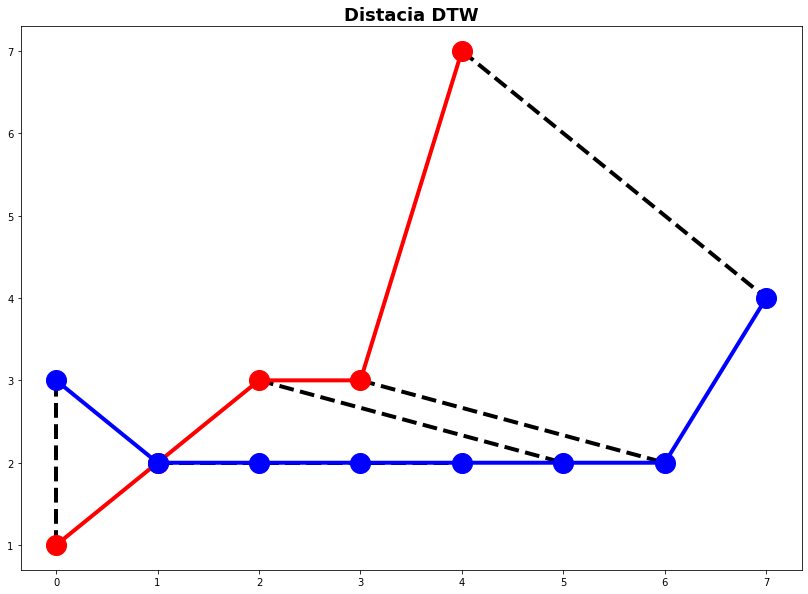

In [ ]:
fig, ax = plt.subplots(figsize=(14, 10))
for [map_x, map_y] in warp_path:
    ax.plot([map_x, map_y], [x[map_x], y[map_y]], '--k', linewidth=4)

ax.plot(x, '-ro', label='x', linewidth=4, markersize=20, markerfacecolor='red', markeredgecolor='red')
ax.plot(y, '-bo', label='y', linewidth=4, markersize=20, markerfacecolor='blue', markeredgecolor='blue')
ax.set_title("Distacia DTW", fontsize=18, fontweight="bold");

##Ejemplo 2



7.0
[(0, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 5), (3, 6), (4, 7)]


Text(0.5, 1.0, 'DTW Distance')

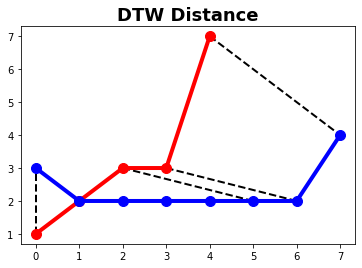

In [ ]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 3, 7])
y = np.array([3, 2, 2, 2, 2, 2, 2, 4])

distance, path = fastdtw(x, y, dist=euclidean)

print(distance)
print(path)

for [xMap,yMap] in path:
  plt.plot ([xMap,yMap], [x[xMap], y[yMap]], '--k', linewidth=2)

plt.plot (x, '-ro', label='x', linewidth=4, markersize=10, markerfacecolor='red', markeredgecolor='red')
plt.plot (y, '-bo', label='y', linewidth=4, markersize=10, markerfacecolor='blue', markeredgecolor='blue')  

plt.title("DTW Distance", fontsize=18, fontweight="bold")


##Ejemplo 3

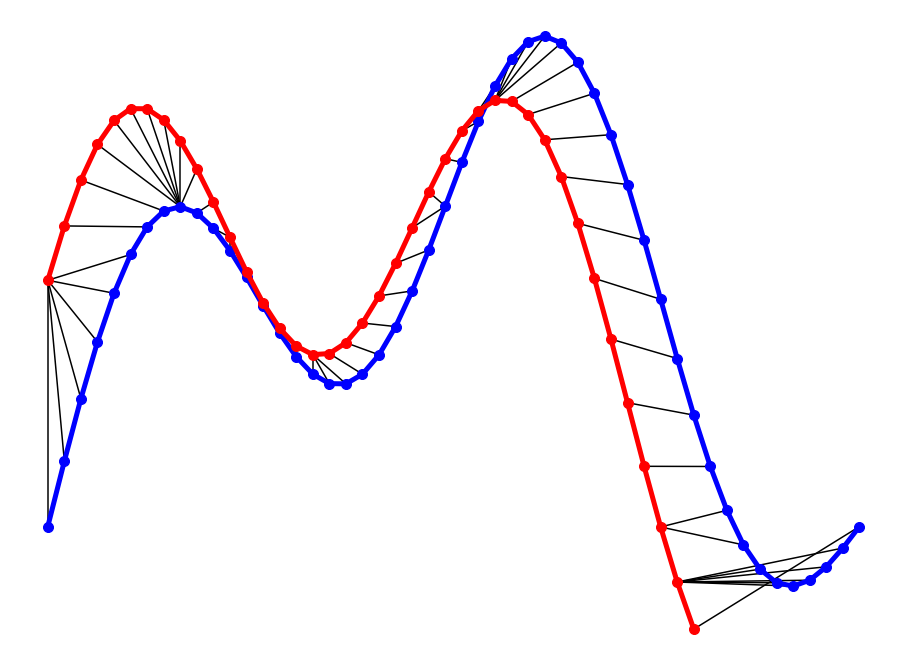

In [ ]:
time1 = np.linspace(start=0, stop=1, num=50)
time2 = time1[0:40]

x1 = 3 * np.sin(np.pi * time1) + 1.5 * np.sin(4*np.pi * time1)
x2 = 3 * np.sin(np.pi * time2 + 0.5) + 1.5 * np.sin(4*np.pi * time2 + 0.5)

distance, warp_path = fastdtw(x1, x2, dist=euclidean)

fig, ax = plt.subplots(figsize=(16, 12))

# Elimina bordes y ejes
fig.patch.set_visible(False)
ax.axis('off')

for [map_x, map_y] in warp_path:
    ax.plot([map_x, map_y], [x1[map_x], x2[map_y]], '-k')

ax.plot(x1, color='blue', marker='o', markersize=10, linewidth=5)
ax.plot(x2, color='red', marker='o', markersize=10, linewidth=5)
ax.tick_params(axis="both", which="major", labelsize=18)


##**Creación de medidas de similaridad**

Regresemos al ejemplo inicial de comparar dos objetos, suponga que ahora se tienen dos características por ejemplo, la talla y el precio, como los dos son numéricos se podrían combinar en un sólo número que represente la similaridad utilizando la raíz del error al cuadrado (RMSE)

* Tamaño (s)
* Precio (p)

$\sqrt {\frac{s^2+p^2}{2}}$

Considerar dos zapatos de tallas 8 y 11 con precios de 120 y 150.

1. Escala del tamaño.  Si se asume que el tamaño más grande es 20. Dividir 8 y 11 entre 20 y se obtendrían 0.4 y 0.55

2. Escala del precio. Dividir 120 y 150 por el precio máximo, supongamos 150, se obtendrían 0.8 y 1.0

3. Encontrar las diferencias en tamaño: 0.55-0.4 = 0.15

4. Encontrar las diferencias en precio: 1-0.8 = 0.2

5. Encontrar el RMSE
$\sqrt {\frac{{0.2}^2+{0.15}^2}{2}}=0.17$

6. Similaridad $1-0.17=0.83$



##Datos categóricos

Pueden ser

* Univalentes, como el color de un coche. Similares 1, en otro caso 0.
* Multivalentes, como el género de una película. (Similaridad de Jaccard). 

Por ejemplo,

['comedia','acción'] y ['comedia', 'acción'] = 1

['comedia', 'acción'] y '['acción'] = 1/2

['comedia', 'acción'] y '['acción', 'drama'] = 1/3

['comedia', 'acción'] y '['no-ficción','musical'] = 0


**Otros ejemplos:** 

códigos postales --> diferencia entre longitud y latitud

color --> convertir a RGB, diferencias por color usando la distancia euclideana






##Ejercicio

Imagine un dataset de casas con las siguientes características

Característica | Tipo
---|---
Precio | entero positivo
Tamaño | flotante positivo en $m^2$
Código postal | entero
Número de recámaras | entero
Tipo de casa | 'unifamiliar', 'multifamiliar', 'departamento', 'town-house'
Cochera | 0/1
Color | Categórica multivalente: 'blanco', 'azul', 'verde', etc.

Para el precio



⬜   Normalizar y escalar a [0,1]

⬜   Crear cuartiles de los datos y escalar a [0,1]

⬜   Hacer una transformación logarítmica y escalar a [0,1]



¿Cuáles de estas caracterísicas son multivalentes?



⬜   Código postal

⬜   Color

⬜ Tipo



¿Qué tipo de similaridad podría usarse para una característica multivalente?



⬜   Distancia euclideana

⬜   Similaridad de Jaccard



#**3.3.1 CLUSTERING**

Agrupar objetos ayuda a entenderlos mejor.

Clustering, proceso de colocar juntas observaciones con características similares que forman un grupo.

Aprendizaje no supervisado

Agrupar **ejemplos no etiquetados** es llamado **clustering**.

Es importante determinar la **medida de similaridad**, por ejemplo libros.

**¿Qué usos tiene el clustering?**

* Segmentación del mercado
* Análisis de redes sociales
* Agrupación de resultados de búsqueda
* Imágenes médicas
* Segmentación de imágenes
* Detección de anomalías


Después del clustering, a cada grupo se le asigna un identificador llamado el **cluster ID**. y se pueden analizar las características representativas de cada cluster.

**Tipos de clustering**

Cuando se selecciona un algoritmo de clustering debe considerarse el tamaño del dataset, ya que algunos no escalan eficientemente.

4 enfoques basados en:    

* centroides
* densidades
* distribuciones
* jerarquías

**Basados en centroides**

Eficientes pero sensibles a las condiciones iniciales y puntos extremos. K-means pertenece a este grupo.

<img src = "https://developers.google.com/machine-learning/clustering/images/CentroidBasedClustering.svg" width = "300"/>

**Basados en densidades**

Conectan areas densas, permiten distribuciones con formas arbitrarias. Dificultades con varias densidades y alta dimensionalidad. No asignan cluster a puntos extremos.

<img src = "https://developers.google.com/machine-learning/clustering/images/DensityClustering.svg" width = "300" />

**Basados en distribuciones**

Si aumenta la distancia desde el centro, la probabilidad de pertenecer a esa distribución disminuye. Cuando no se conoce el tipo de distribución en los datos, debe usarse otro tipo de algoritmo.

<img src = "https://developers.google.com/machine-learning/clustering/images/DistributionClustering.svg" width = "300" />

**Basados en jerarquías**

Crea un árbol de clusters, funciona bien cuando existen taxonomías.El número de clusters se selecciona cortando el árbol en el nivel apropiado.

<img src = "https://developers.google.com/machine-learning/clustering/images/HierarchicalClustering.svg" width = "300" />

**Clustering workflow**

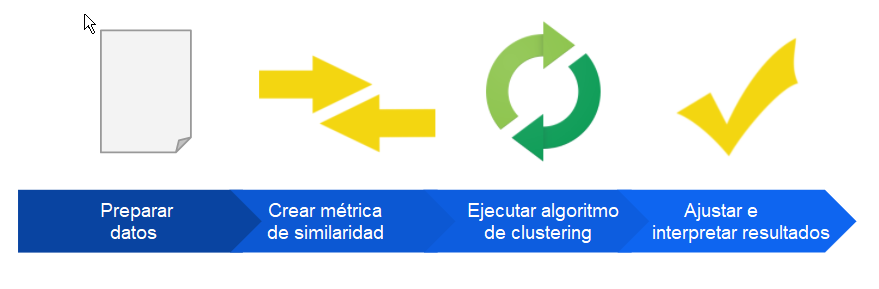

Como en cualquier problema de ML: normalizar y transformar, además hay que asegurarse de que se puedan aplicar las medidas de similaridad, cómo cuantificar que tan similares son dos ejemplos.

##K-Means

El número de grupos es específico.

Tiene una complejidad lineal, $Θ(n)$.

Uso de números aleatorios, por lo que se dice que es no-determinístico

Desde la década de 1950, laboratorios Bell.

Se publicó hasta 1982
Es relativamente simple de implementar

Pasos:
1. Inicialización
2. Asignación
3. Actualización

Vamos a suponer que inicialmente están asignadas a un cluster

Los pasos de asignación y de actualización se repetirán hasta que ningún elemento se mueva de cluster.

***Paso de asignación:***

Cada clúster está definido por:
* Centroide, vector de la misma longitud de la observación, pero representa el promedio de todas las observaciones dentro del cluster, así que esencialmente es un punto que está en el centro del cluster.
* Lista de todas las observaciones asignadas a él.

El paso de asignación recorre todas las observaciones y las asigna al cluster con el centroide más cercano (mínima distancia entre dos vectores)

También es importante mantener la lista de las observaciones que se mueven de un cluster a otro, ya que permiten determinar cuándo termina el algoritmo. 

* Hasta que ninguna se mueve



Ejemplo paso a paso:

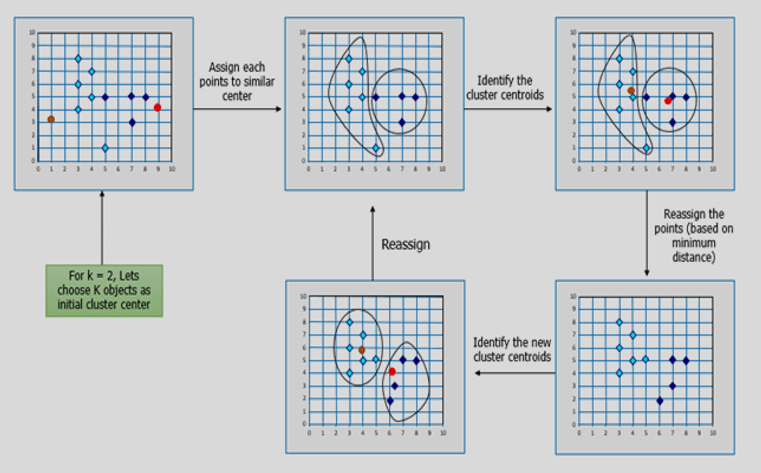

Normalmente se utiliza un medida de similaridad basada en el error cuadrático:
$$
\sum_{i=1}^{k} \sum_{p \in C_i}^{k} |p-m_i|^{2}$$


Donde $p$ representa al objeto y $m_i$ a la media del clúster $C_i$ (ambos objetos multidimensionales)
K-means es susceptible a valores extremos porque distorsionan la distribución de los datos.

La calidad se evalúa con base a una función de costo que mide la disimilaridad promedio entre un objeto y la mediana en su clúster.

Para ver si un objeto aleatorio es un buen reemplazo de la mediana se consideran todos los objetos que no sean medianas y se analiza la re-distribución de los objetos a partir de la cual se calcula un costo; basado, por ejemplo, en el error cuadrático. Esto se repite hasta que no exista mejora.

Cómo en muchos de los métodos, este no garantiza encontrar el mínimo global, por lo que se recomienda correr varias veces el algoritmo con diferentes valores iniciales.

Otra variante es hacer un k-means jerárquico, en donde se inicia con k = 2 y se continua formando clusters sucesivos en cada rama.

Si se desea escalarlo a grandes bases de datos, se toman únicamente muestras de los datos.

También se pueden utilizar las modas (***k-models***) para agrupar objetos categóricos

Otra posibilidad es usar medianas (***k-medoids***) para agrupar en base al objeto más representativo del clúster (ie, el objeto más representativo). La estrategia es reemplazar una de las medianas por otro objeto en forma aleatoria y medir si la calidad de los clusters resultantes mejora.


##K-MEDOIDS

Cluster donde la disimilaridad promedio de todos los objetos es mínima.

Para ser medoide se requiere:

1. Ser miembro (punto/objeto) del conjunto de datos
2. Suma de distancias de él al resto de los puntos sea mínima

Diferencia entre Means y Medoid

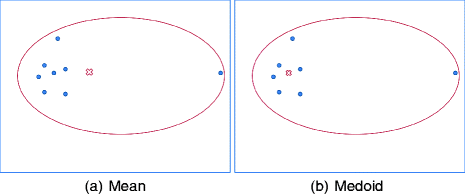

##Ejemplos

In [1]:
#Ejemplo simple

import numpy as np
import matplotlib.pyplot as plt

#Generación de datos sintéticos
from sklearn.datasets import make_blobs
x,y = make_blobs (centers=4, n_samples=200, random_state=0, cluster_std=0.7)
print (x[:10], "\n" , y[:10])


[[ 2.26403424  1.82613379]
 [-0.97647444  2.59138889]
 [ 1.10046838  4.02254067]
 [-2.82715074  7.11970523]
 [ 1.53393915  0.31915668]
 [ 0.98362009  5.55389667]
 [-1.74452433  2.98606238]
 [ 0.35482006  2.9172298 ]
 [ 1.83747356  5.14545322]
 [ 1.48663347  4.39407536]] 
 [1 2 0 3 1 0 2 0 0 0]


In [2]:
x

array([[ 2.26403424,  1.82613379],
       [-0.97647444,  2.59138889],
       [ 1.10046838,  4.02254067],
       [-2.82715074,  7.11970523],
       [ 1.53393915,  0.31915668],
       [ 0.98362009,  5.55389667],
       [-1.74452433,  2.98606238],
       [ 0.35482006,  2.9172298 ],
       [ 1.83747356,  5.14545322],
       [ 1.48663347,  4.39407536],
       [ 0.53224461,  4.04986851],
       [ 2.49292954, -0.2237767 ],
       [-2.19606551,  2.67569502],
       [-2.60546192,  2.96216566],
       [ 3.40132694,  1.93402401],
       [ 2.01804661,  5.63090975],
       [-1.50354126,  7.94515271],
       [-1.25923325,  7.94810973],
       [-1.43566925,  7.04585208],
       [ 1.45240954,  2.23470913],
       [-1.75197885,  7.26636492],
       [-0.72027192,  3.67361528],
       [ 1.80747178, -0.06480225],
       [-1.18128477,  2.8366095 ],
       [ 2.71986209,  0.95894953],
       [ 1.73639477,  0.90989907],
       [-0.29308348,  7.35284559],
       [ 1.56907002,  0.79291948],
       [ 1.01138721,

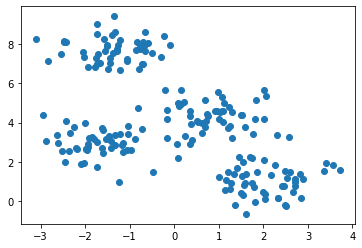

In [ ]:
plt.scatter (x[:,0],x[:,1])


In [ ]:
from sklearn.cluster import KMeans

modelo = KMeans (4)
modelo.fit(x)
print (modelo.cluster_centers_)


[[-1.36512238  7.70188306]
 [-1.70639178  2.9104771 ]
 [ 2.07464749  0.9869902 ]
 [ 0.86008475  4.31501411]]


Text(0.5, 1.0, 'KMeans')

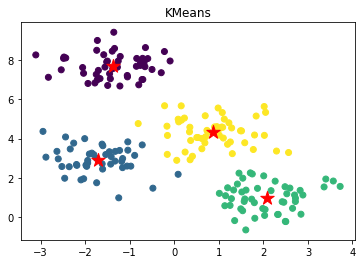

In [ ]:
plt.scatter (x[:,0],x[:,1], c=modelo.labels_)
plt.scatter(modelo.cluster_centers_[:,0], modelo.cluster_centers_[:,1], s=200, marker="*", color="red")
plt.title ("KMeans")

Mismo ejemplo pero con KMedoids

In [ ]:
!pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 5.2 MB/s 
     |████████████████████████████████| 23.2 MB 1.8 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
from sklearn_extra.cluster import KMedoids

modeloMedoids = KMedoids (4)
modeloMedoids.fit(x)
print (modeloMedoids.cluster_centers_)

[[ 1.73639477  0.90989907]
 [-1.74452433  2.98606238]
 [-1.27777579  7.63463898]
 [ 0.75818331  4.34310307]]


Text(0.5, 1.0, 'KMedoids')

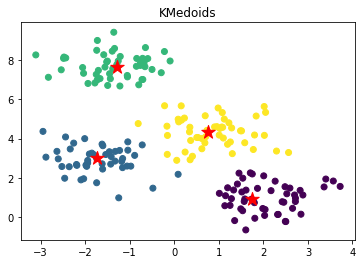

In [ ]:
plt.scatter (x[:,0],x[:,1], c=modeloMedoids.labels_)
plt.scatter(modeloMedoids.cluster_centers_[:,0], modeloMedoids.cluster_centers_[:,1], s=200, marker="*", color="red")
plt.title ("KMedoids")

###Evalación



In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y, modelo.labels_)
print ("Accuracy score: ", acc)

Accuracy score:  0.0


In [ ]:
#Función para encontrar la etiqueta más común

import scipy
def encuentraEtiqueta (numClusters, etiqReal, etiquetas):
  permutación =[]
  for i in range (numClusters):
    idx = etiquetas == i
    nuevaEtiq = scipy.stats.mode (etiqReal[idx])[0][0]#seleccina la más común
    permutación.append (nuevaEtiq)
  return (permutación)

permutación = encuentraEtiqueta(4,y, modelo.labels_)
print (permutación)


[3, 2, 1, 0]


In [ ]:
nuevasEtiq = [ permutación[etiq] for etiq in modelo.labels_]
print ("Accuracy score: ", accuracy_score(y,nuevasEtiq))

Accuracy score:  0.99


In [ ]:
#!pip install -U yellowbrick

In [ ]:
#!pip install -U scikit-learn

In [ ]:

!pip install yellowbrick==0.9.1 scikit-learn==0.22.2


     |████████████████████████████████| 7.1 MB 5.1 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn-extra 0.2.0 requires scikit-learn>=0.23.0, but you have scikit-learn 0.22.2 which is incompatible.


Cuando se desconoce el número de clusters (lo más común) el método del codo (elbow) permite encontrar el k óptimo.

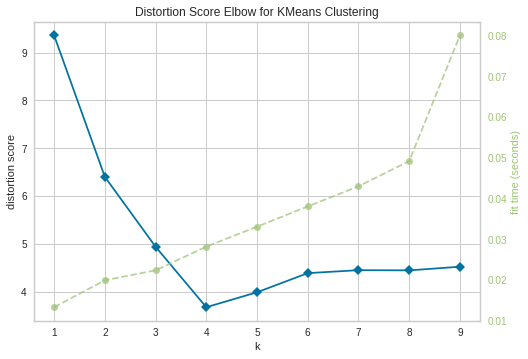

In [ ]:
from sklearn import metrics
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

#Generación de datos sintéticos
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
x,y = make_blobs (centers=4, n_samples=200, random_state=0, cluster_std=0.7)
model = KMeans ()
visualizer = KElbowVisualizer (model, k = (1,10))
visualizer.fit (x)
visualizer.poof ()

La mínima distorción, que es la suma de las distancias al cuadrado de cada punto al cluster, es k= 4.

##K-Medoids con curvas

In [ ]:
!pip install dtaidistance

     |████████████████████████████████| 1.1 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for dtaidistance: filename=dtaidistance-2.3.2-cp37-cp37m-linux_x86_64.whl size=1586348 sha256=ea7a55e8251a54a2bceb68590c1fc81414f248740fac8e6276b6ae597c8d01bd
  Stored in directory: /root/.cache/pip/wheels/5e/4a/9a/30f9efb3926e3c2f28231680685b36d0041466a33e4b8f8367
Successfully built dtaidistance


In [ ]:
!pip install pyclustering

(None, None)

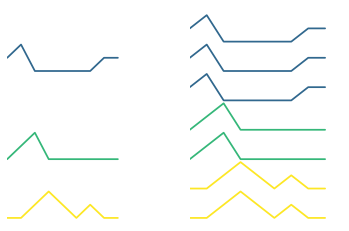

In [ ]:
import numpy as np

from dtaidistance import dtw, clustering
from pyclustering.cluster.kmedoids import kmedoids

s = np.array([
         [0., 0, 1, 2, 1, 0, 1, 0, 0],
         [0., 1, 2, 0, 0, 0, 0, 0, 0],
         [1., 2, 0, 0, 0, 0, 0, 1, 1],
         [0., 0, 1, 2, 1, 0, 1, 0, 0],
         [0., 1, 2, 0, 0, 0, 0, 0, 0],
         [1., 2, 0, 0, 0, 0, 0, 1, 1],
         [1., 2, 0, 0, 0, 0, 0, 1, 1]])

model = clustering.KMedoids(dtw.distance_matrix_fast, {}, k=3)
cluster_idx = model.fit(s)
model.plot ()


#Ejercicio

Encontrar el número de clusters óptimo de las trayectorias de los alumnos usando el método del codo.

Realizar la interpretación de los resultados obtenidos.